In [15]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
df=pd.read_csv('Customers.csv') 

In [7]:
df.head(10)

,age,income,gender,m_status,buys
0,25.0,high,male,single,no
1,25.0,high,male,married,no
2,35.0,high,male,single,yes
3,35.0,medium,male,single,yes
4,30.0,low,female,single,yes
5,32.0,low,female,single,no
6,22.0,low,female,NaN,yes
7,NaN,medium,male,married,no
8,25.0,low,female,single,yes
9,35.0,medium,female,married,yes


In [8]:
df.tail(10)

,age,income,gender,m_status,buys
12,22.0,high,female,single,yes
13,35.0,medium,male,married,no
14,NaN,high,male,single,no
15,25.0,high,female,married,yes
16,35.0,medium,male,married,yes
17,22.0,high,female,single,yes
18,25.0,medium,female,married,yes
19,30.0,high,male,single,yes
20,30.0,medium,female,married,no
21,25.0,low,male,single,yes


In [9]:
df.shape

(22, 5)

In [10]:
df.isnull().sum()

age         2
income      0
gender      0
m_status    1
buys        0
dtype: int64

In [11]:
df.age.mean()

28.65

# Replacing null values of age with mean age

In [12]:
fillAge=df.age.mean()
df.age=df.age.fillna(fillAge)
df.isnull().sum()

age         0
income      0
gender      0
m_status    1
buys        0
dtype: int64

In [13]:
df.age.head(22)

0     25.00
1     25.00
2     35.00
3     35.00
4     30.00
5     32.00
6     22.00
7     28.65
8     25.00
9     35.00
10    25.00
11    35.00
12    22.00
13    35.00
14    28.65
15    25.00
16    35.00
17    22.00
18    25.00
19    30.00
20    30.00
21    25.00
Name: age, dtype: float64

# Replacing null value of marital status with modal value

In [47]:
df['m_status'] = df['m_status'].fillna(df['m_status'].mode()[0])

In [48]:
df.isnull().sum()

age         0
income      0
gender      0
m_status    0
buys        0
dtype: int64

In [50]:
df.head(10)

,age,income,gender,m_status,buys
0,25.00,high,male,single,no
1,25.00,high,male,married,no
2,35.00,high,male,single,yes
3,35.00,medium,male,single,yes
4,30.00,low,female,single,yes
5,32.00,low,female,single,no
6,22.00,low,female,single,yes
7,28.65,medium,male,married,no
8,25.00,low,female,single,yes
9,35.00,medium,female,married,yes


<AxesSubplot:xlabel='m_status', ylabel='Count'>

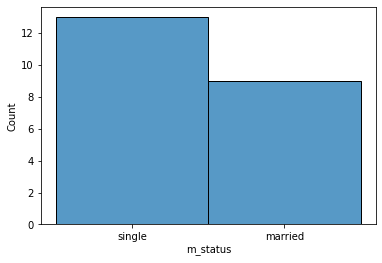

In [51]:
sns.histplot(df.m_status)

# Ordinal Encoding for Income Column

In [52]:
df.income.unique()

array(['high', 'medium', 'low'], dtype=object)

In [61]:
income=['low', 'medium', 'high']

In [62]:
from sklearn.preprocessing import OrdinalEncoder as OE

In [63]:
ordinal=OE(categories=[income])

In [64]:
encoded=ordinal.fit_transform(df[['income']])

In [65]:
newIncome=pd.DataFrame(encoded, columns=['Income'])

In [66]:
newIncome

,Income
0,2.0
1,2.0
2,2.0
3,1.0
4,0.0
5,0.0
6,0.0
7,1.0
8,0.0
9,1.0


In [67]:
df=pd.concat([df, newIncome], axis=1)

In [68]:
df.head(10)

,age,income,gender,m_status,buys,Income
0,25.00,high,male,single,no,2.0
1,25.00,high,male,married,no,2.0
2,35.00,high,male,single,yes,2.0
3,35.00,medium,male,single,yes,1.0
4,30.00,low,female,single,yes,0.0
5,32.00,low,female,single,no,0.0
6,22.00,low,female,single,yes,0.0
7,28.65,medium,male,married,no,1.0
8,25.00,low,female,single,yes,0.0
9,35.00,medium,female,married,yes,1.0


In [69]:
df = df.drop("income", axis=1)

In [70]:
df.head(10)

,age,gender,m_status,buys,Income
0,25.00,male,single,no,2.0
1,25.00,male,married,no,2.0
2,35.00,male,single,yes,2.0
3,35.00,male,single,yes,1.0
4,30.00,female,single,yes,0.0
5,32.00,female,single,no,0.0
6,22.00,female,single,yes,0.0
7,28.65,male,married,no,1.0
8,25.00,female,single,yes,0.0
9,35.00,female,married,yes,1.0


# Label encoding for Gender

In [71]:
from sklearn.preprocessing import LabelEncoder as LE

In [75]:
le=LE()

In [76]:
df.gender=le.fit_transform(df['gender'])

In [77]:
df.head(10)

,age,gender,m_status,buys,Income
0,25.00,1,single,no,2.0
1,25.00,1,married,no,2.0
2,35.00,1,single,yes,2.0
3,35.00,1,single,yes,1.0
4,30.00,0,single,yes,0.0
5,32.00,0,single,no,0.0
6,22.00,0,single,yes,0.0
7,28.65,1,married,no,1.0
8,25.00,0,single,yes,0.0
9,35.00,0,married,yes,1.0


# Label Encoding for M_Status and Buys using loop

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       22 non-null     float64
 1   gender    22 non-null     int64  
 2   m_status  22 non-null     object 
 3   buys      22 non-null     object 
 4   Income    22 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1008.0+ bytes


In [80]:
for column in df.columns:
    if df[column].dtype==np.number:
        continue
    df[column]=le.fit_transform(df[column])

<ipython-input-80-fdfaa4ee93d5>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype==np.number:


In [81]:
df.head(10)

,age,gender,m_status,buys,Income
0,25.00,1,1,0,2.0
1,25.00,1,0,0,2.0
2,35.00,1,1,1,2.0
3,35.00,1,1,1,1.0
4,30.00,0,1,1,0.0
5,32.00,0,1,0,0.0
6,22.00,0,1,1,0.0
7,28.65,1,0,0,1.0
8,25.00,0,1,1,0.0
9,35.00,0,0,1,1.0


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       22 non-null     float64
 1   gender    22 non-null     int64  
 2   m_status  22 non-null     int32  
 3   buys      22 non-null     int32  
 4   Income    22 non-null     float64
dtypes: float64(2), int32(2), int64(1)
memory usage: 832.0 bytes


<AxesSubplot:xlabel='m_status', ylabel='Count'>

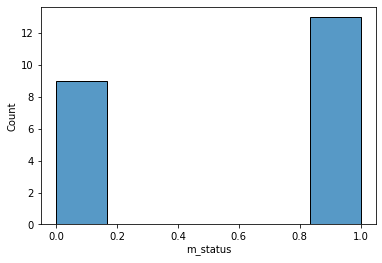

In [83]:
sns.histplot(df.m_status)

<AxesSubplot:xlabel='buys', ylabel='Count'>

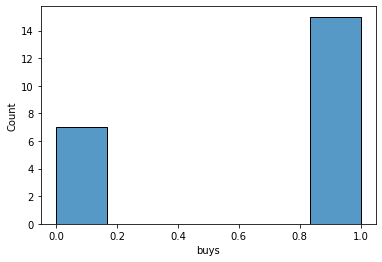

In [85]:
sns.histplot(df.buys)